<a href="https://colab.research.google.com/github/m-rabiul-hossain/Real-Time-Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files

# This will open a file picker dialog
uploaded = files.upload('framingham.csv')

Saving framingham.csv to framingham.csv/framingham (3).csv


In [ ]:
disease_df = pd.read_csv("framingham.csv/framingham.csv")
disease_df.drop(columns=['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [ ]:
disease_df.dropna(axis = 0, inplace = True)
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Features and target
X = disease_df[['age', 'Sex_male', 'cigsPerDay', 'diabetes',
                'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']]
y = disease_df['TenYearCHD']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (fit only on training data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Train set:', X_train_scaled.shape, y_train.shape)
print('Test set:', X_test_scaled.shape, y_test.shape)


Train set: (3000, 9) (3000,)
Test set: (751, 9) (751,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(y_train_res.value_counts())

TenYearCHD
0    2543
1    2543
Name: count, dtype: int64


/tmp/ipython-input-2413258200.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,


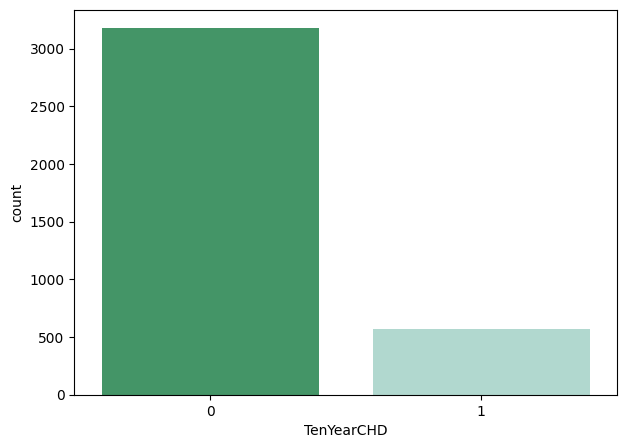

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df,
             palette="BuGn_r")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=12,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("----- Random Forest -----")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


----- Random Forest -----
Accuracy: 0.829560585885486

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.96      0.91       636
           1       0.30      0.09      0.14       115

    accuracy                           0.83       751
   macro avg       0.58      0.53      0.52       751
weighted avg       0.77      0.83      0.79       751


Confusion Matrix:
 [[613  23]
 [105  10]]


In [ ]:
import numpy as np

# Example: manual input function
def predict_chd():
    print("Enter patient details:")
    age = float(input("Age: "))
    sex_male = int(input("Sex (0 = Female, 1 = Male): "))
    cigsPerDay = float(input("Cigarettes per day: "))
    diabetes = int(input("Diabetes (0 = No, 1 = Yes): "))
    totChol = float(input("Total Cholesterol: "))
    sysBP = float(input("Systolic BP: "))
    diaBP = float(input("Diastolic BP: "))
    BMI = float(input("BMI: "))
    glucose = float(input("Glucose: "))

    # Create feature array
    user_data = np.array([[age, sex_male, cigsPerDay, diabetes,
                           totChol, sysBP, diaBP, BMI, glucose]])

    # Scale features using the same scaler as training
    user_data_scaled = scaler.transform(user_data)

    # Predict using trained Random Forest
    prediction = rf.predict(user_data_scaled)
    probability = rf.predict_proba(user_data_scaled)[0][1]

    if prediction[0] == 1:
        print(f"Prediction: CHD risk detected! Probability: {probability:.2f}")
    else:
        print(f"Prediction: No CHD risk detected. Probability: {probability:.2f}")

# Run the prediction function
predict_chd()

Enter patient details:
Age: 30
Sex (0 = Female, 1 = Male): 0
Cigarettes per day: 30
Diabetes (0 = No, 1 = Yes): 1
Total Cholesterol: 120
Systolic BP: 110
Diastolic BP: 80
BMI: 25
Glucose: 80
Prediction: CHD risk detected! Probability: 0.68


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)

print("----- Naive Bayes -----")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


----- Naive Bayes -----
Accuracy: 0.8255659121171771

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       636
           1       0.37      0.20      0.26       115

    accuracy                           0.83       751
   macro avg       0.62      0.57      0.58       751
weighted avg       0.79      0.83      0.80       751


Confusion Matrix:
 [[597  39]
 [ 92  23]]


In [ ]:
#LogisticRegression



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

lr.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test_scaled)

print("----- Logistic Regression -----")
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))



----- Logistic Regression -----
Accuracy: 0.6644474034620506

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.67      0.77       636
           1       0.26      0.65      0.37       115

    accuracy                           0.66       751
   macro avg       0.59      0.66      0.57       751
weighted avg       0.81      0.66      0.71       751


Confusion Matrix:
 [[424 212]
 [ 40  75]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm = SVC(
    kernel='rbf',
    class_weight='balanced',
    probability=True,
    random_state=42
)

svm.fit(X_train_scaled, y_train)

y_pred = svm.predict(X_test_scaled)

print("----- Support Vector Machine -----")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


----- Support Vector Machine -----
Accuracy: 0.6604527296937417

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77       636
           1       0.24      0.56      0.33       115

    accuracy                           0.66       751
   macro avg       0.57      0.62      0.55       751
weighted avg       0.79      0.66      0.71       751


Confusion Matrix:
 [[432 204]
 [ 51  64]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test_scaled)

print("----- Decision Tree -----")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


----- Decision Tree -----
Accuracy: 0.681757656458056

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       636
           1       0.23      0.45      0.30       115

    accuracy                           0.68       751
   macro avg       0.55      0.59      0.55       751
weighted avg       0.78      0.68      0.72       751


Confusion Matrix:
 [[460 176]
 [ 63  52]]
